# Iranian Entities
### Descriptive statistics

This notebook provides an overview of the Iranian entities. The notebook is divided into three parts:

> Fill rates
1. How many entities have been scraped
2. What are the fill rates in each field? 
3. Which fields are empty

> Data Cleaning
1. Which fields need to be parsed? 
2. Is it easy to parse the fields and how? 

> Statistics
1. What is the average number of linked entities? 
2. In which country are entities mainly located? 

>Conclusion
- Take aways
- Action items

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_json('iranianentities.json')

# Part 1: Fill rates

> Descriptive Stats

- There are 988 entries and 921 unique company profiles. 
- 615 companies have a unique address. <br>
`Hyptothesis  1` - Companies that share a unique address are likely values where only country is present or the address field is empty
 

In [2]:
df.describe() 

,Entity,Address,phone_number,company_website,Country,Weapon Program,Suspected Links,Information,Created,Last_updated,profile_picture
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,923,617,32,279,48,23,412,893,173,245,255
top,Iranian Space Agency,,,,,Military,[],Oversees Iran's space-related initiatives; car...,"January 26, 2004","January 16, 2016",
freq,39,142,637,645,879,326,295,39,153,99,670


# Data Cleaning

> Deal with Empty String Values
- Replace empty strings in `Country field` with N/A

In [3]:
my_list = df['Country']
for i in range(len(my_list)): 
    if my_list[i] == '':
        my_list[i] = 'NA'

# Statistical Analysis

## Distribution of linked entities

> "An entitity is on average linked to 2.4 other entities. The highest number of links is 22 and the lowest number is 1. There are 296 entities without any links"

1. Count the number of linked entities and add the results in a column

In [4]:
item_counts = []
for row in df['Suspected Links']:
    item_counts.append(len([item for item in row if item]))
df['Number of Suspected Entities'] = item_counts


3. Split the linked entity counts into bins and count number of entities with 0 links
4. Calculate the mean number of suspected entites
5. Take the standard deviation and the mean and plot on a graph with plt.plot()


In [5]:
bins = pd.cut(df['Number of Suspected Entities'], bins=[1,2, 4, 6, 8, 12, 14, 16, 18, 20, 22])
counts = bins.value_counts()
number_nulls = len(df[df['Number of Suspected Entities'] == 0]) #count number of entities with 0 links. 

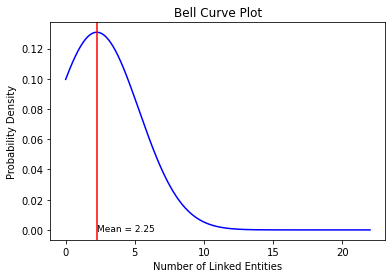

In [6]:
number_suspects = df['Number of Suspected Entities']
mean  = number_suspects.mean()
std_dev = number_suspects.std()
x_values = np.linspace(number_suspects.min(), number_suspects.max(), 1000)
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-np.power(x_values - mean, 2) / (2 * np.power(std_dev, 2)))
plt.plot(x_values, pdf, color='blue', label='PDF')
plt.axvline(x=mean, color='red', linestyle='solid')
plt.text(mean, -0.001, f'Mean = {mean:.2f}', fontsize=9)
plt.xlabel('Number of Linked Entities')
plt.ylabel('Probability Density')
plt.title('Bell Curve Plot')
plt.show()


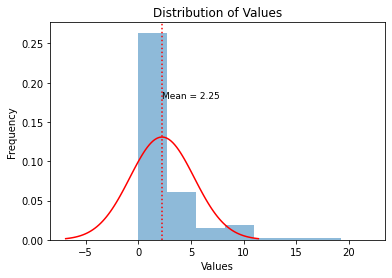

In [7]:
number_suspects = df['Number of Suspected Entities']
mean  = number_suspects.mean()
std = number_suspects.std()

x = np.linspace(mean - 3*std, mean + 3*std, 100)
y = 1/(std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2))

fig, ax = plt.subplots()
ax.hist(number_suspects, bins=8, density=True, alpha=0.5)
plt.axvline(x=mean, color='red', linestyle='dotted')
plt.text(mean, 0.18, f'Mean = {mean:.2f}', fontsize=9)
ax.plot(x, y, color='red')
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Values')
plt.show()

## Distribution of entities

There are 640 linked entiies and companies that have links are based in 40 countries. The 10 most common countries where an entitiy with suspected links is based are: 
1. UAE
2. Hong Kong
3. UK
4. China
5. Turkey
6. Germany
7. Malaysia
8. Russia
9. Lebanon
10. Afghanistan

This suggests that Iranian companies based outside Iran are more likely to have links to  other entities than companies based inside Iran.

In [8]:
Country = df
Country = df[['Country', 'Number of Suspected Entities']]
Country = Country.explode('Country')
Country= Country[Country['Country'] !='NA']  
Country= Country[Country['Number of Suspected Entities'] != 0]  
Country = Country.groupby('Country', as_index=False).sum()
Country = Country.sort_values('Number of Suspected Entities', ascending=False)


print(Country.nlargest(10, 'Number of Suspected Entities'))



                 Country  Number of Suspected Entities
36  United Arab Emirates                            89
12             Hong Kong                            65
37        United Kingdom                            61
7                  China                            53
35                Turkey                            48
11               Germany                            34
18              Malaysia                            31
26                Russia                            27
17               Lebanon                            22
0            Afghanistan                            19


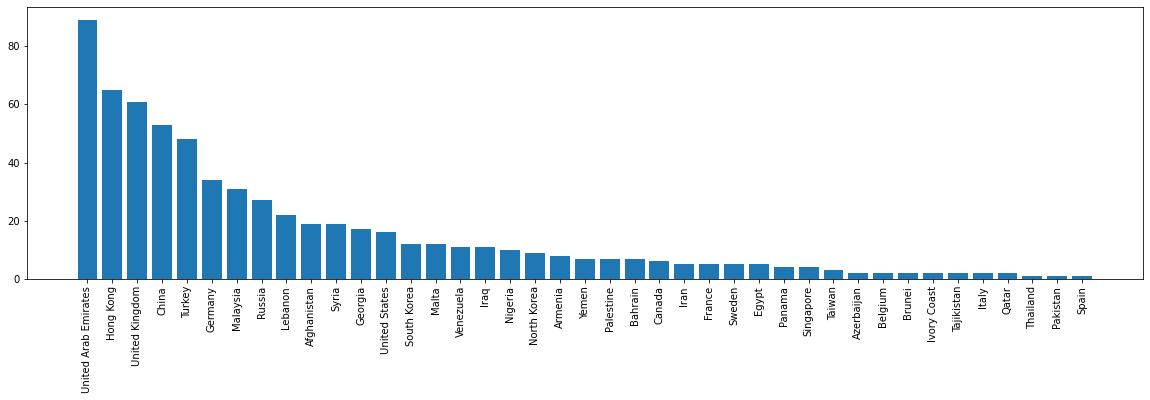

In [9]:

plt.figure(figsize=(20,5))
plt.bar(Country['Country'], Country['Number of Suspected Entities'])

plt.xticks(rotation='vertical')
plt.show()
